In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('urbania_data_clean.csv')

# Dropeando Columnas que no aportan al modelo

In [3]:
df = df.drop(columns =["Descripcion", "Anunciante", "Fecha_pub", "latitud", "longitud"], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7644 entries, 0 to 7643
Columns: 161 entries, Antiguedad to ratioDormitorios
dtypes: float64(4), int64(79), object(78)
memory usage: 9.4+ MB


## Correlacion

In [74]:
corrmat = df_num.corr()

In [75]:
columns = corrmat.nlargest(12, 'Precio')['Precio'].index

In [76]:
corrmat = df_num[columns].corr()

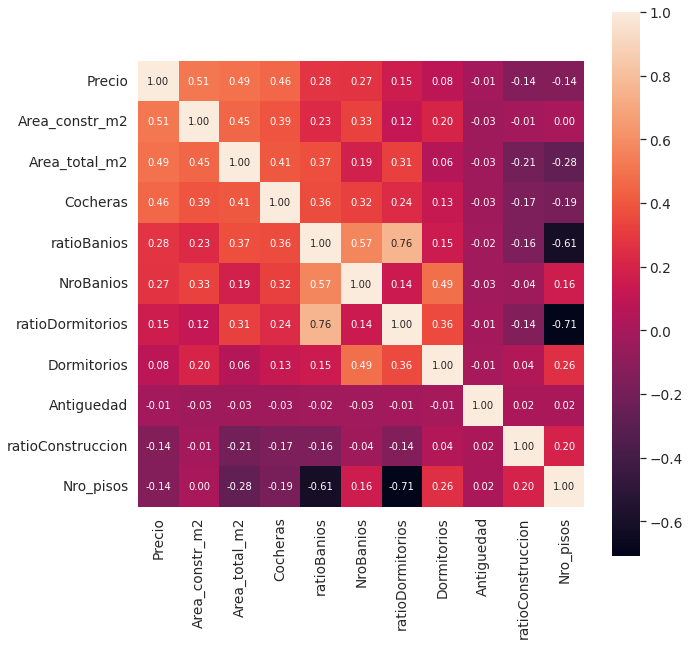

In [77]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
heat_map = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

# Convirtiendo las variables categoricas a numericas

In [78]:
# Luego de revisar cada columna..

## NUMERICAS
num_cols_originales = [
    'Antiguedad',
    'NroBanios',
    'Nro_pisos',
    'Cocheras',
    'Dormitorios',
    #'fecha_publicacion',
    'Precio',
    'Area_constr_m2',
    'Area_total_m2',

]

num_cols = [
    'Antiguedad',
    'NroBanios',
    'Nro_pisos',
    'Cocheras',
    'Dormitorios',
    #'fecha_publicacion',
    'Precio',
    'Area_constr_m2',
    'Area_total_m2',
    "ratioConstruccion",
    "ratioBanios",
    "ratioDormitorios",

]

col_garma = [
    'Cocheras',
    'Precio',
    'Area_constr_m2',
    'Area_total_m2',
    "ratioBanios",
    'NroBanios',
]

In [6]:
df = df.sort_values(by = 'fecha_publicacion')

In [7]:
df.select_dtypes('object').columns

Index(['Balneario', 'Direccion', 'Estado de Inmueble', 'Luminosidad',
       'Mascotas', 'Tipo', 'TipoCochera', 'Uso_comercial', 'Uso_profesional',
       ''Cuarto de servicio'', ''Deposito'', ''Terraza'', ''Kitchenette'',
       ''Sala de estar'', ''Sotano'', ''Patio'', ''anx81tico'',
       ''Comedor diario'', ''Comedor'', ''Banio de servicio'',
       ''Jardanxadn Interno'', ''Walking Closet'', ''Escritorio'', ''Cocina'',
       ''Banio independiente'', ''Lavanderanxada'', ''Balcon'', ''Sala'',
       ''Closet'', ''Banio de visitas'', ''Agua'', ''Guardiananxada'',
       ''Internet'', ''Luz'', ''Cable'', ''Servicio de Limpieza'',
       ''Conexion a gas'', ''Sistema de seguridad'', ''Telefono'',
       ''Areadeportiva'', ''Piscina'', ''Solarium'', ''Sala de internet'',
       ''Sala de cine'', ''Jardanxadn'', ''Parque interno'', ''Guarderanxada'',
       ''anx81reas verdes'', ''Club House'', ''Hall de ingreso'',
       ''Areade BBQ'', ''Gimnasio'', ''Areade sauna'', ''Juegos para ni

In [8]:
df.select_dtypes('number').columns

Index(['Antiguedad', 'NroBanios', 'Nro_pisos', 'Cocheras', 'Dormitorios',
       'Precio', 'Area_constr_m2', 'Area_total_m2', 'Balneario_IMP',
       'Estado de Inmueble_IMP', 'Luminosidad_IMP', 'Uso_comercial_IMP',
       'Uso_profesional_IMP', 'TipoCochera_IMP', ''Cuarto de servicio'_IMP',
       ''Deposito'_IMP', ''Terraza'_IMP', ''Kitchenette'_IMP',
       ''Sala de estar'_IMP', ''Sotano'_IMP', ''Patio'_IMP', ''anx81tico'_IMP',
       ''Comedor diario'_IMP', ''Comedor'_IMP', ''Banio de servicio'_IMP',
       ''Jardanxadn Interno'_IMP', ''Walking Closet'_IMP', ''Escritorio'_IMP',
       ''Cocina'_IMP', ''Banio independiente'_IMP', ''Lavanderanxada'_IMP',
       ''Balcon'_IMP', ''Sala'_IMP', ''Closet'_IMP', ''Banio de visitas'_IMP',
       ''Agua'_IMP', ''Guardiananxada'_IMP', ''Internet'_IMP', ''Luz'_IMP',
       ''Cable'_IMP', ''Servicio de Limpieza'_IMP', ''Conexion a gas'_IMP',
       ''Sistema de seguridad'_IMP', ''Telefono'_IMP', ''Areadeportiva'_IMP',
       ''Piscina'_IMP', '

## DF con solo variables numericas originales

In [9]:
df_num_org = df[num_cols_originales]

## DF con solo variables numericas

In [10]:
df_num = df[num_cols]

## DF sin algunas variables construccion

In [67]:
df_num_constr = df_num.drop(columns = [
    'Area_constr_m2'
    #'Area_total_m2',
    #"ratioConstruccion",
    #"ratioBanios",
    #"ratioDormitorios"
])

## DF top 5 corr

In [84]:
df_top5corr = df_num[col_garma]

## DF con variables numericas y categoricas

In [12]:
df_num_cat = df.drop(columns = ["fecha_publicacion"])

# Separando dataset en val, test, train

In [13]:
def train_test_val_split(df):
    df_val = df.iloc[int(df.shape[0]*0.9):]
    df_training = df.iloc[:int(df.shape[0]*0.9)]
    df_train, df_test = train_test_split(df_training, random_state = 0, test_size = 0.2)
    return df_train, df_test, df_val

In [14]:
def x_y_split(df, target):
    x =  df.drop(columns = target)
    y = df[target].values
    return x, y

## Modelo 1: variables numericas originales

In [15]:
df_train, df_test, df_val = train_test_val_split(df_num_org)

In [16]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))

train:  0.41362331131739527
test:  0.26593441262683837
val:  0.39854712460516595


## Modelo 2: variables numericas

In [20]:
df_train, df_test, df_val = train_test_val_split(df_num)

In [21]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))

train:  0.41898649286193446
test:  0.2716230297817399
val:  0.3946752527436225


## Model 2.5: construccion

In [68]:
df_train, df_test, df_val = train_test_val_split(df_num_constr)

In [69]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [70]:
model = LinearRegression()

In [71]:
model.fit(x_train, y_train)

LinearRegression()

In [72]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))

train:  0.34339357304251794
test:  0.32287067873525
val:  0.301876328546805


## Model 2.6: primeras 5 corr

In [85]:
df_train, df_test, df_val = train_test_val_split(df_top5corr)

In [86]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [87]:
model = LinearRegression()

In [88]:
model.fit(x_train, y_train)

LinearRegression()

In [89]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))

train:  0.4095850475672608
test:  0.26462475678737785
val:  0.39745561153902575


## Model 3: variables numericas normalizando precio

In [25]:
df_train, df_test, df_val = train_test_val_split(df_num)

In [26]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [27]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
y_val = np.log1p(y_val)

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))

train:  0.5362166581335345
test:  0.3936900344224613
val:  0.5198767703096199


## Model 4: variables numericas y categoricas

In [36]:
df_train, df_test, df_val = train_test_val_split(df_num_cat)

In [37]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'ND'

In [ ]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))

## Model 5: variables numericas y categoricas normalizando precio

In [ ]:
df_train, df_test, df_val = train_test_val_split(df_num_cat)

In [ ]:
x_train, y_train = x_y_split(df_train, "Precio")
x_test, y_test = x_y_split(df_test, "Precio")
x_val, y_val = x_y_split(df_val, "Precio")

In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
y_val = np.log1p(y_val)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
print("train: ",model.score(x_train, y_train))
print("test: ",model.score(x_test, y_test))
print("val: ",model.score(x_val, y_val))